![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [14]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Start coding here
workout = pd.read_csv("data/workout.csv")
three_keywords = pd.read_csv("data/three_keywords.csv")
workout_geo = pd.read_csv("data/workout_geo.csv")
three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")

display(workout.head(20))

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51
5,2018-08,58
6,2018-09,50
7,2018-10,49
8,2018-11,47
9,2018-12,48


In [16]:
year_df = workout.loc[workout["workout_worldwide"].idxmax()]
year_str = str(year_df["month"])[: 4]

year_str

'2020'

In [17]:
three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


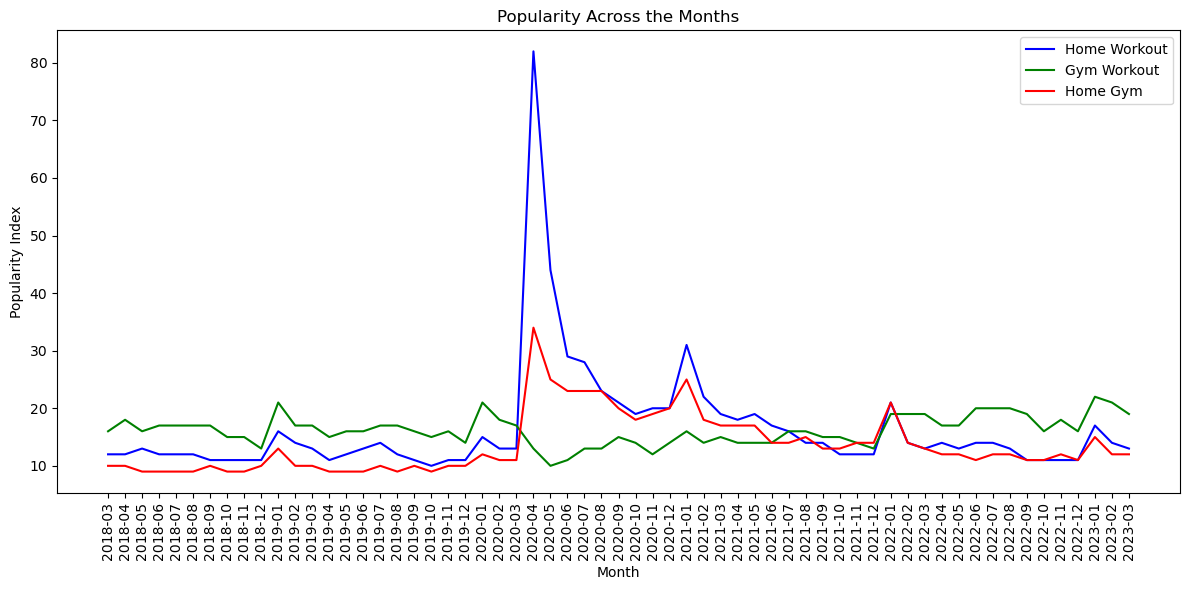

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(three_keywords["month"], three_keywords["home_workout_worldwide"], color = "blue", label = "Home Workout")
plt.plot(three_keywords["month"], three_keywords["gym_workout_worldwide"], color = "green", label = "Gym Workout")
plt.plot(three_keywords["month"], three_keywords["home_gym_worldwide"], color = "red", label = "Home Gym")
plt.xlabel("Month")
plt.ylabel("Popularity Index")
plt.title("Popularity Across the Months")
plt.xticks(rotation = 90)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
peak_covid = "home_workout"
current = "gym_workout"

print(peak_covid)
print(current)

home_workout
gym_workout


In [20]:
workout_geo.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [21]:
top_country_df = workout_geo.loc[workout_geo["workout_2018_2023"].idxmax()]
top_country = top_country_df["country"]
top_country

'United States'

In [22]:
three_keywords_geo.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [23]:
three_keywords_clean = three_keywords_geo.drop(columns = ["gym_workout_2018_2023", "home_gym_2018_2023"])
three_keywords_clean.set_index("Country")

,home_workout_2018_2023
Country,
Gibraltar,NaN
Lesotho,NaN
Guam,NaN
Botswana,NaN
Brunei,NaN
...,...
Tokelau,NaN
Tuvalu,NaN
U.S. Outlying Islands,NaN


In [24]:
three_keywords_clean_two = three_keywords_clean[three_keywords_clean["Country"].isin(["Philippines", "Malaysia"])]
three_keywords_clean_two.set_index("Country")

,home_workout_2018_2023
Country,
Philippines,52.0
Malaysia,47.0


In [25]:
home_workout_geo_df = three_keywords_clean_two[three_keywords_clean_two["home_workout_2018_2023"] == three_keywords_clean_two["home_workout_2018_2023"].max()]
home_workout_geo_df["Country"]

23    Philippines
Name: Country, dtype: object

In [26]:
home_workout_geo = "Philippines"